In [1]:
import matplotlib.pyplot as plt
import numpy as np

import WD_models

# Example 1: converting H--R diagram coordinate into WD parameters

In [17]:
model = WD_models.load_model(low_mass_model='Fontaine2001',
                             middle_mass_model='Renedo2010_001',
                             high_mass_model='ONe',
                             spec_type='H',
                             )

# the cooling age at (BP-RP, G) = (0.25, 13) and (0.25, 14)
bp_rp = np.array([0.25, 0.25])
G = np.array([13,14])
age_cool = model['HR_to_age_cool'](bp_rp, G)

print(age_cool)

[ 1.28440266  2.70046388]


In [18]:
model = WD_models.load_model('f', 'r001', 'o', 'H',
                             HR_bands=('u-g', 'G'),)

In [19]:
model_A = WD_models.load_model('', 'f', 'f', 'H')
model_B = WD_models.load_model('', 'f', 'f', 'He')

d_age_cool = (model_A['HR_to_age_cool'](0, 13) - model_B['HR_to_age_cool'](0, 13))

print(d_age_cool)

0.110596332926


# Example 2: plotting contours on the H--R diagram

/Users/scheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


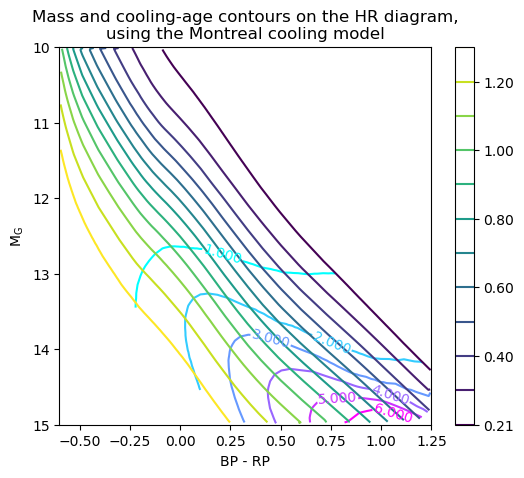

In [21]:
HR_grid = (-0.6, 1.25, 0.002, 10, 15, 0.01)
model  = WD_models.load_model('f', 'f', 'f', 'H', HR_grid=HR_grid) 

# get rid of some artifects of interpolation
grid_x, grid_y = np.mgrid[HR_grid[0]:HR_grid[1]:HR_grid[2], HR_grid[3]:HR_grid[4]:HR_grid[5]]
model['grid_HR_to_age_cool'][model['HR_to_mass'](grid_x, grid_y) < 0.21] = np.nan

plt.figure(figsize=(6,5),dpi=100)

# plot cooling age contours
CS = plt.contour(model['grid_HR_to_age_cool'].T,
                 levels=[1,2,3,4,5,6], 
                 extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
                 cmap='cool',
                )
plt.clabel(CS, inline=True, use_clabeltext=True)

# plot mass contours
plt.contour(model['grid_HR_to_mass'].T,
            levels=[0.21,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.29], 
            extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
           )
plt.colorbar()

plt.title('Mass and cooling-age contours on the HR diagram,\nusing the Montreal cooling model')
plt.gca().invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('$\\rm M_G$')
plt.show()

# Example 3: comparing the cooling rates

/Users/scheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


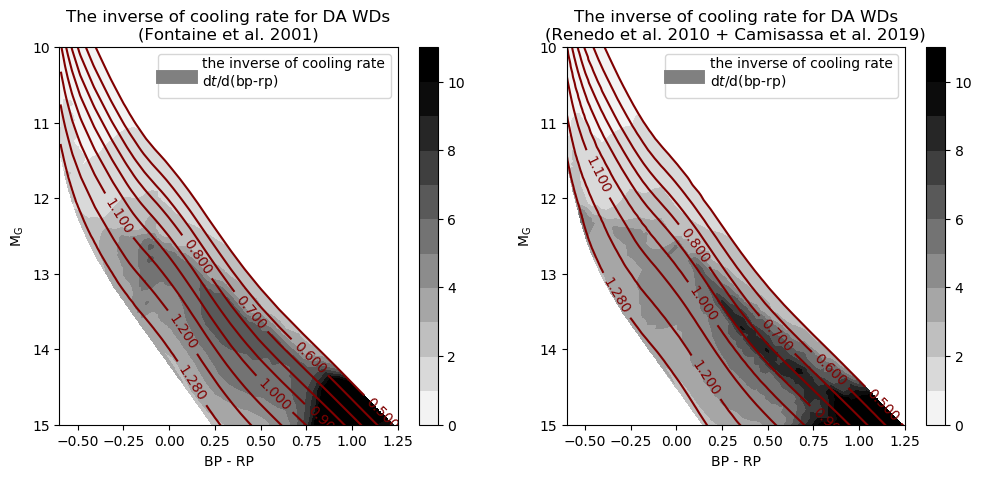

In [22]:
HR_grid = (-0.7, 1.5, 0.002, 9.9, 15.1, 0.01)
model_1 = WD_models.load_model('f', 'f', 'f', 'H', HR_grid=HR_grid)
model_2 = WD_models.load_model('f', 'r001', 'o', 'H', HR_grid=HR_grid) 

# plot
model_list = [model_1, model_2]
title2 = ['(Fontaine et al. 2001)', '(Renedo et al. 2010 + Camisassa et al. 2019)']

plt.figure(figsize=(12,5),dpi=100)
for i in range(2):
    plt.subplot(1,2,i+1)
    
    # plot the mass contour
    CS = plt.contour(model_list[i]['grid_HR_to_mass'].T,
                     levels=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.28], 
                     extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
                     cmap='jet', vmin=-1000)
    plt.clabel(CS, inline=True, use_clabeltext=True)
    
    # get rid of some artifects of interpolation
    grid_x, grid_y = np.mgrid[HR_grid[0]:HR_grid[1]:HR_grid[2], HR_grid[3]:HR_grid[4]:HR_grid[5]]
    model_list[i]['grid_HR_to_cool_rate^-1'][model_list[i]['HR_to_mass'](grid_x, grid_y) < 0.5] = np.nan
    
    # plot the slowing-down effect of phase separation
    plt.contourf(model_list[i]['grid_HR_to_cool_rate^-1'].T,
                 levels=[0,1,2,3,4,5,6,7,8,9,10,16],
                 extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
                 cmap='binary', vmax=10)
    plt.colorbar()
    
    # plot the legend
    plt.plot([0,0],[1,1],'-', color='gray', lw=10, 
             label='the inverse of cooling rate\n' + 'd$t$/d(bp-rp)')
    plt.legend()
    
    # set the figure
    plt.title('The inverse of cooling rate for DA WDs\n' + 
              title2[i])
    plt.xlabel('BP - RP')
    plt.ylabel('$\\rm M_G$')
    plt.xlim(-0.6,1.25)
    plt.ylim(15,10)
plt.show()

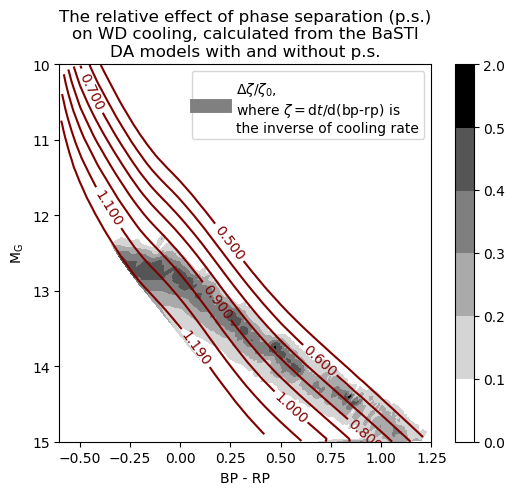

In [23]:
# load the BaSTI models with and without phase separation
HR_grid = (-0.6, 1.25, 0.002, 10, 15, 0.01)
model_1 = WD_models.load_model('f', 'b', 'b', 'H', HR_grid=HR_grid) 
model_2 = WD_models.load_model('f', 'bn', 'bn', 'H', HR_grid=HR_grid)

plt.figure(figsize=(6,5),dpi=100)

# plot the mass contour
CS = plt.contour(model_1['grid_HR_to_mass'].T,
                 levels=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.19], 
                 extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
                 cmap='jet', vmin=-1000)
plt.clabel(CS, inline=True, use_clabeltext=True)

# plot the slowing-down effect of phase separation
contrast = ((model_1['grid_HR_to_cool_rate^-1'] - model_2['grid_HR_to_cool_rate^-1']) /
            (model_2['grid_HR_to_cool_rate^-1'])).T
plt.contourf(contrast, 
             levels=[0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 2],
             extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
             cmap='binary', vmin=0.05, vmax=0.65)
plt.colorbar()

# plot the legend
plt.plot([0,0],[1,1],'-', color='gray', lw=10, 
         label='$\\Delta\\zeta/\\zeta_0$,\n' +
                'where $\\zeta=$d$t$/d(bp-rp) is\n' + 
                'the inverse of cooling rate')
plt.legend()

# set the figure
plt.title('The relative effect of phase separation (p.s.)\n' +
          'on WD cooling, calculated from the BaSTI\n' + 
          'DA models with and without p.s.')
plt.xlabel('BP - RP')
plt.ylabel('$\\rm M_G$')
plt.xlim(-0.6,1.25)
plt.ylim(15,10)
plt.show()

# Example 4: plotting cooling tracks on H--R diagram

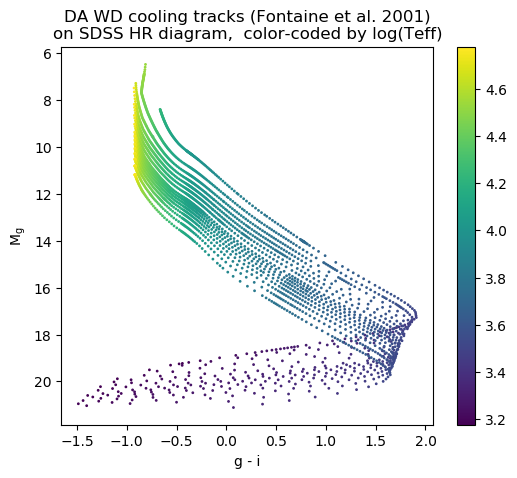

In [24]:
logteff_logg_grid = (3.0, 5.1, 0.01, 6.5, 9.6, 0.01)

model = WD_models.load_model('f', 'f', 'f', 'H', 
                             HR_bands=('g-i','g'), 
                             logteff_logg_grid=logteff_logg_grid)

plt.figure(figsize=(6,5),dpi=100)
plt.scatter(model['color'], model['Mag'], c=model['logteff'], s=1)
plt.colorbar()

plt.title('DA WD cooling tracks (Fontaine et al. 2001)\non SDSS HR diagram,  color-coded by log(Teff)')
plt.xlabel('g - i')
plt.ylabel('$\\rm M_g$')
plt.gca().invert_yaxis()
plt.show()

# Example 5: transformation between any desired WD parameters

In [25]:
model = WD_models.load_model('f', 'r001', 'o', 'H')

# interpolate the desired mapping
m_logteff_to_agecool = WD_models.interp_xy_z_func(x=model['mass_array'],
                                                  y=model['logteff'],
                                                  z=model['age_cool'],
                                                  interp_type='linear',
                                                  )
# the cooling age for (m_WD, Teff) = (1.1 Msun, 10000 K)
age_cool = m_logteff_to_agecool(1.1, np.log10(10000))

print(age_cool)

2.1917495897185257


# The IMFR and total age calculation

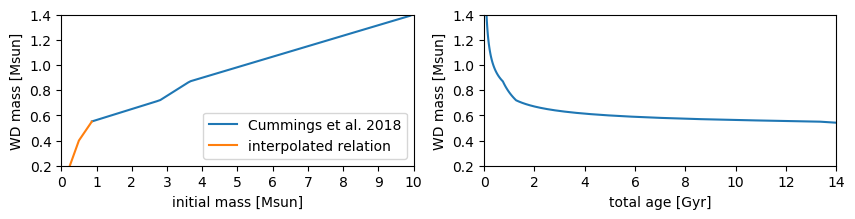

In [10]:
from scipy.interpolate import interp1d
IFMR = interp1d((0.19, 0.4, 0.552, 0.72, 0.87, 1.25, 1.4),
                (0.23, 0.5, 0.87, 2.8, 3.65, 8.2, 10),
                fill_value = 0, bounds_error=False)
# note that in my definition here Mini = IFMR(M_WD)

plt.figure(figsize=(10,2), dpi=100)
plt.subplot(1,2,1)

M_WD = np.arange(0.552,1.4,0.01)
plt.plot(IFMR(M_WD), M_WD, label='Cummings et al. 2018')
M_WD = np.arange(0.2,0.552,0.01)
plt.plot(IFMR(M_WD), M_WD, label='interpolated relation')

plt.legend()
plt.xlabel('initial mass [Msun]')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0, 10)
plt.ylabel('WD mass [Msun]')
plt.yticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4])
plt.ylim(0.2,1.4)

plt.subplot(1,2,2)

t_index = -2
M_WD = np.arange(0.2,1.4,0.01)
total_age = IFMR(M_WD)**t_index*10

plt.plot(total_age, M_WD)
plt.xlabel('total age [Gyr]')
plt.xlim(0,14)
plt.ylabel('WD mass [Msun]')
plt.yticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4])
plt.ylim(0.2, 1.4)

plt.show()